In [216]:
# Code based on https://mikesmathpage.wordpress.com/2020/04/05/sharing-a-neat-statistical-result-from-one-of-nassim-talebs-papers-with-kids/


In [217]:
# Explores a result from https://twitter.com/nntaleb/status/1246389636865445888

In [129]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt



In [130]:
from functools import partial

In [171]:
N_EXPERIMENTS = 10000
N_DRAWS = 1000

In [172]:
N_KNOWN_DATA = 200

In [183]:
def run_pdf_experiments(pdf_samples, num_experiments = 1000, num_known_data = 20, num_draws = 1000):
    probabilities = []
    for i in range(num_experiments):
        # For each experiment draw K_KNOWN_DATA from the distribution and get their max
        s = pdf_samples(num_known_data)
        max_experiment = max(s)

        # Draw N_TRIALS and compute the probability of exceding the maximum of K_KNOWN_DATA 
        j = pdf_samples(num_draws)
        exceding_values = np.count_nonzero(j > max(s))   
        probabilities.append(exceding_values/num_draws)
    return probabilities

# Normal

In [184]:
mu, sigma = 0, 0.1 # mean and standard deviation
normal_samples = partial(np.random.normal, mu, sigma)

In [190]:
normal_data = run_pdf_experiments(normal_samples, N_EXPERIMENTS, N_KNOWN_DATA, N_DRAWS)

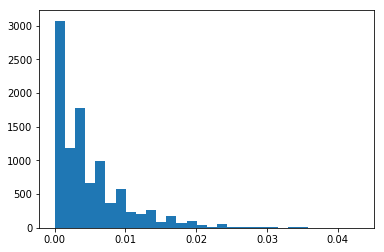

In [191]:
plt.hist(normal_data,bins=30);

In [192]:
1 / np.mean(normal_data) # Should be approx 1 / N_KNOWN_DATA

201.63322915616487

# Pareto

In [208]:
a, m = 3., 2.  # shape and mode
s = (np.random.pareto(a, 10) + 1) * m

def pareto_samples(num_samples):
    return (np.random.pareto(a, num_samples) + 1) * m

In [209]:
pareto_data = run_pdf_experiments(pareto_samples,N_EXPERIMENTS, N_KNOWN_DATA, N_DRAWS)

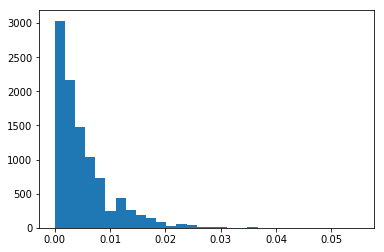

In [210]:
plt.hist(pareto_data,bins=30);

In [211]:
1 / np.mean(pareto_data) # Should be approx 1 / N_KNOWN_DATA

204.55335774336731

# Exponential

In [212]:
exp_samples = partial(np.random.exponential, 1.0)

In [213]:
exp_data = run_pdf_experiments(exp_samples,N_EXPERIMENTS, N_KNOWN_DATA, N_DRAWS)

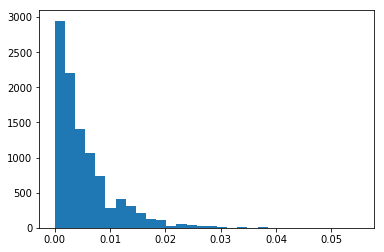

In [214]:
plt.hist(exp_data,bins=30);

In [215]:
1 / np.mean(exp_data) # Should be approx 1 / N_KNOWN_DATA

197.39829053080396